# 뉴스 제목으로 주제 분류

In [2]:
# 모듈
import pandas as pd
import numpy as np

## [1] 데이터 전처리

In [3]:
# 데이터 불러오기
df=pd.read_csv('./Data/train_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45654 non-null  int64 
 1   title      45654 non-null  object
 2   topic_idx  45654 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [4]:
# 중복 확인
df.duplicated().sum()

0

In [5]:
# 주제별 분포 확인
df['topic_idx'].value_counts()

4    7629
2    7362
5    6933
6    6751
1    6222
3    5933
0    4824
Name: topic_idx, dtype: int64

In [6]:
# 필요한 칼럼만 배열로 변환
x_train=np.array(df['title'])
y_train=np.array(df['topic_idx'])

In [7]:
x_train.shape, y_train.shape

((45654,), (45654,))

In [8]:
# 어간 분리 후 불용어 제거 함수
from konlpy.tag import Okt

def sentWord(sent):
    okt=Okt()
    tokens=okt.morphs(sent)
    stopwords=["은","는","이","가","!","\"","$","%","&","'","(",")","*","+",",","-",".","...","…","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]
    
    w_list=[]
    for word in tokens:
        if word not in stopwords:
            w_list.append(word)
    
    return w_list

# 불용어 제거 함수
# def stopWords(list):
#     stopwords=["은","는","이","가","!","\"","$","%","&","'","(",")","*","+",",","-",".","...","…","0","1","2","3","4","5","6","7","8","9",";","<","=",">","?","@","\\","^","_","`","|","~","·","—","——","‘","’","“","”","…","、","。","〈","〉","《","》","가","가까스로","가령","각","각각","각자","각종","갖고말하자면","같다","같이","개의치않고","거니와","거바","거의","것","것과 같이","것들","게다가","게우다","겨우","견지에서","결과에 이르다","결국","결론을 낼 수 있다","겸사겸사","고려하면","고로","곧","공동으로","과","과연","관계가 있다","관계없이","관련이 있다","관하여","관한","관해서는","구","구체적으로","구토하다","그","그들","그때","그래","그래도","그래서","그러나","그러니","그러니까","그러면","그러므로","그러한즉","그런 까닭에","그런데","그런즉","그럼","그럼에도 불구하고","그렇게 함으로써","그렇지","그렇지 않다면","그렇지 않으면","그렇지만","그렇지않으면","그리고","그리하여","그만이다","그에 따르는","그위에","그저","그중에서","그치지 않다","근거로","근거하여","기대여","기점으로","기준으로","기타","까닭으로","까악","까지","까지 미치다","까지도","꽈당","끙끙","끼익","나","나머지는","남들","남짓","너","너희","너희들","네","넷","년","논하지 않다","놀라다","누가 알겠는가","누구","다른","다른 방면으로","다만","다섯","다소","다수","다시 말하자면","다시말하면","다음","다음에","다음으로","단지","답다","당신","당장","대로 하다","대하면","대하여","대해 말하자면","대해서","댕그","더구나","더군다나","더라도","더불어","더욱더","더욱이는","도달하다","도착하다","동시에","동안","된바에야","된이상","두번째로","둘","둥둥","뒤따라","뒤이어","든간에","들","등","등등","딩동","따라","따라서","따위","따지지 않다","딱","때","때가 되어","때문에","또","또한","뚝뚝","라 해도","령","로","로 인하여","로부터","로써","륙","를","마음대로","마저","마저도","마치","막론하고","만 못하다","만약","만약에","만은 아니다","만이 아니다","만일","만큼","말하자면","말할것도 없고","매","매번","메쓰겁다","몇","모","모두","무렵","무릎쓰고","무슨","무엇","무엇때문에","물론","및","바꾸어말하면","바꾸어말하자면","바꾸어서 말하면","바꾸어서 한다면","바꿔 말하면","바로","바와같이","밖에 안된다","반대로","반대로 말하자면","반드시","버금","보는데서","보다더","보드득","본대로","봐","봐라","부류의 사람들","부터","불구하고","불문하고","붕붕","비걱거리다","비교적","비길수 없다","비로소","비록","비슷하다","비추어 보아","비하면","뿐만 아니라","뿐만아니라","뿐이다","삐걱","삐걱거리다","사","삼","상대적으로 말하자면","생각한대로","설령","설마","설사","셋","소생","소인","솨","쉿","습니까","습니다","시각","시간","시작하여","시초에","시키다","실로","심지어","아","아니","아니나다를가","아니라면","아니면","아니었다면","아래윗","아무거나","아무도","아야","아울러","아이","아이고","아이구","아이야","아이쿠","아하","아홉","안 그러면","않기 위하여","않기 위해서","알 수 있다","알았어","앗","앞에서","앞의것","야","약간","양자","어","어기여차","어느","어느 년도","어느것","어느곳","어느때","어느쪽","어느해","어디","어때","어떠한","어떤","어떤것","어떤것들","어떻게","어떻해","어이","어째서","어쨋든","어쩔수 없다","어찌","어찌됏든","어찌됏어","어찌하든지","어찌하여","언제","언젠가","얼마","얼마 안 되는 것","얼마간","얼마나","얼마든지","얼마만큼","얼마큼","엉엉","에","에 가서","에 달려 있다","에 대해","에 있다","에 한하다","에게","에서","여","여기","여덟","여러분","여보시오","여부","여섯","여전히","여차","연관되다","연이서","영","영차","옆사람","예","예를 들면","예를 들자면","예컨대","예하면","오","오로지","오르다","오자마자","오직","오호","오히려","와","와 같은 사람들","와르르","와아","왜","왜냐하면","외에도","요만큼","요만한 것","요만한걸","요컨대","우르르","우리","우리들","우선","우에 종합한것과같이","운운","월","위에서 서술한바와같이","위하여","위해서","윙윙","육","으로","으로 인하여","으로서","으로써","을","응","응당","의","의거하여","의지하여","의해","의해되다","의해서","이","이 되다","이 때문에","이 밖에","이 외에","이 정도의","이것","이곳","이때","이라면","이래","이러이러하다","이러한","이런","이럴정도로","이렇게 많은 것","이렇게되면","이렇게말하자면","이렇구나","이로 인하여","이르기까지","이리하여","이만큼","이번","이봐","이상","이어서","이었다","이와 같다","이와 같은","이와 반대로","이와같다면","이외에도","이용하여","이유만으로","이젠","이지만","이쪽","이천구","이천육","이천칠","이천팔","인 듯하다","인젠","일","일것이다","일곱","일단","일때","일반적으로","일지라도","임에 틀림없다","입각하여","입장에서","잇따라","있다","자","자기","자기집","자마자","자신","잠깐","잠시","저","저것","저것만큼","저기","저쪽","저희","전부","전자","전후","점에서 보아","정도에 이르다","제","제각기","제외하고","조금","조차","조차도","졸졸","좀","좋아","좍좍","주룩주룩","주저하지 않고","줄은 몰랏다","줄은모른다","중에서","중의하나","즈음하여","즉","즉시","지든지","지만","지말고","진짜로","쪽으로","차라리","참","참나","첫번째로","쳇","총적으로","총적으로 말하면","총적으로 보면","칠","콸콸","쾅쾅","쿵","타다","타인","탕탕","토하다","통하여","툭","퉤","틈타","팍","팔","퍽","펄렁","하","하게될것이다","하게하다","하겠는가","하고 있다","하고있었다","하곤하였다","하구나","하기 때문에","하기 위하여","하기는한데","하기만 하면","하기보다는","하기에","하나","하느니","하는 김에","하는 편이 낫다","하는것도","하는것만 못하다","하는것이 낫다","하는바","하더라도","하도다","하도록시키다","하도록하다","하든지","하려고하다","하마터면","하면 할수록","하면된다","하면서","하물며","하여금","하여야","하자마자","하지 않는다면","하지 않도록","하지마","하지마라","하지만","하하","한 까닭에","한 이유는","한 후","한다면","한다면 몰라도","한데","한마디","한적이있다","한켠으로는","한항목","할 따름이다","할 생각이다","할 줄 안다","할 지경이다","할 힘이 있다","할때","할만하다","할망정","할뿐","할수있다","할수있어","할줄알다","할지라도","할지언정","함께","해도된다","해도좋다","해봐요","해서는 안된다","해야한다","해요","했어요","향하다","향하여","향해서","허","허걱","허허","헉","헉헉","헐떡헐떡","형식으로 쓰여","혹시","혹은","혼자","훨씬","휘익","휴","흐흐","흥","힘입어","︿","！","＃","＄","％","＆","（","）","＊","＋","，","０","１","２","３","４","５","６","７","８","９","：","；","＜","＞","？","＠","［","］","｛","｜","｝","～","￥"]
#     sent=[]
#     for word in list:
#         if word not in stopwords:
#             sent.append(word)
#     return sent

In [9]:
x_train[1]

'실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화'

In [10]:
sentWord(x_train[1])

['실리콘밸리', '넘어서겠다', '구글', '15조원', '들여', '美', '전역', '거점', '화']

In [11]:
sentences=[]
for sent in x_train:
    sentences.append(sentWord(sent))

In [12]:
sent_len=[len(x) for x in sentences]
sent_len=np.array(sent_len)
sent_len.max(), sent_len.min(), sent_len.mean()

(19, 1, 9.326586936522538)

In [53]:
# 메모리 에러
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

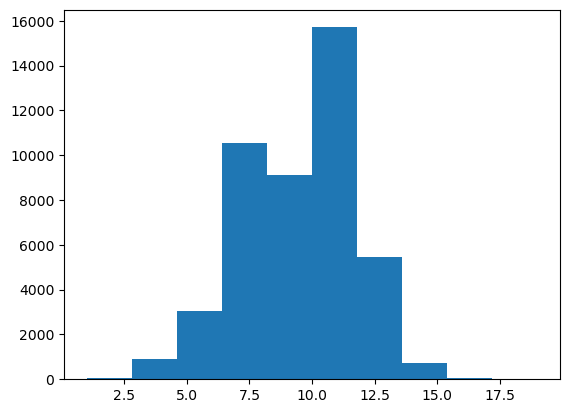

In [54]:
import matplotlib.pyplot as plt
plt.hist(sent_len)
plt.show()

In [14]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# 토큰화, voca, 패딩 함수 

def sentToken(sents, numWord=10):
    tokenizer=Tokenizer(oov_token=1, num_words=numWord)
    tokenizer.fit_on_texts(sents)
    
    return tokenizer






def sentPad(tokenizer, sents):
    # 문장을 생성된 사전(vaca)을 기반으로 수치화
    seq_voca=tokenizer.texts_to_sequences(sents)
    
    # 패딩
    encoding=pad_sequences(seq_voca, maxlen=19)
    
    return encoding

In [15]:
tokenizer_test=sentToken(sentences, numWord=10000)

In [16]:
sorted(tokenizer_test.word_counts.items(), key=lambda x: x[1], reverse=True)[1680]

('유은혜', 50)

In [17]:
#t1=np.array(list(tokenizer_test.word_counts.values()))

In [18]:
#t2=pd.DataFrame(list(tokenizer_test.word_counts.values()))

In [19]:
#t2.describe()

In [20]:
tokenizer=sentToken(sentences, numWord=1681)
encoding=sentPad(tokenizer, sentences)

In [31]:
encoding.shape

(45654, 19)

In [21]:
from keras.utils import to_categorical

# OHE 원핫인코딩
def ohe(encoding):
    ohe=to_categorical(encoding)
    return ohe

In [22]:
ohe=ohe(encoding)

In [23]:
ohe.shape, to_categorical(y_train).shape

((45654, 19, 1681), (45654, 7))

## [2] 모델 만들기

In [24]:
# 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ohe, y_train,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_train)

In [25]:
x_train.shape, x_test.shape

((36523, 19, 1681), (9131, 19, 1681))

In [26]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout, LSTM

# 모델 만들기
def makeModel(num1, num2):
        
    model=Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(num1, num2), return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(LSTM(16, activation='relu', return_sequences=True))
    model.add(LSTM(8, activation='relu'))

    model.add(Dense(7, activation='softmax'))
    model.summary()
    
    return model

In [27]:
model=makeModel(19, 1681)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 19, 64)            446976    
                                                                 
 dropout (Dropout)           (None, 19, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 19, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 19, 16)            3136      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 7)                 63        
                                                                 
Total params: 463,391
Trainable params: 463,391
Non-trai

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy') # sparse_

In [29]:
# 모델 체크포인트 생성
from keras.callbacks import ModelCheckpoint

path='./model/{epoch:02d}-{val_accuracy:.4f}.hdf5'
model_ckpt = ModelCheckpoint(path, save_best_only=True, monitor='val_accuracy')

In [35]:
# 학습

# 교차검증
from sklearn.model_selection import StratifiedKFold

n_fold = 5  
seed = 42

cv = StratifiedKFold(n_splits = n_fold, shuffle=True, random_state=seed)

for i, (i_trn, i_val) in enumerate(cv.split(x_train, y_train), 1):
    print(f'training model for CV #{i}')

    model.fit(x_train[i_trn], 
            to_categorical(y_train[i_trn]),
            validation_data=(x_train[i_val], to_categorical(y_train[i_val])),
            epochs=10,
            batch_size=512,
            callbacks=[model_ckpt])

training model for CV #1
Epoch 1/10
58/58 [==============================] - 15s 255ms/step - loss: 0.2674 - accuracy: 0.9118 - val_loss: 0.2816 - val_accuracy: 0.9060
Epoch 2/10
58/58 [==============================] - 13s 220ms/step - loss: 0.2548 - accuracy: 0.9142 - val_loss: 0.2323 - val_accuracy: 0.9259
Epoch 3/10
58/58 [==============================] - 13s 221ms/step - loss: 0.2544 - accuracy: 0.9161 - val_loss: 0.2014 - val_accuracy: 0.9337
Epoch 4/10
58/58 [==============================] - 14s 234ms/step - loss: 0.2348 - accuracy: 0.9230 - val_loss: 0.2195 - val_accuracy: 0.9306
Epoch 5/10
58/58 [==============================] - 17s 288ms/step - loss: 0.2424 - accuracy: 0.9194 - val_loss: 0.1870 - val_accuracy: 0.9398
Epoch 6/10
58/58 [==============================] - 16s 272ms/step - loss: 0.2338 - accuracy: 0.9233 - val_loss: 0.2033 - val_accuracy: 0.9328
Epoch 7/10
58/58 [==============================] - 16s 268ms/step - loss: 0.2314 - accuracy: 0.9232 - val_loss: 0.18

## [3] 평가

In [42]:
# 모델 불러오기
from keras.models import load_model

# model2=load_model('./model/01-0.9483.hdf5')


In [43]:
# 모델 평가
# model2.evaluate(x_test, to_categorical(y_test))

In [44]:
import os
mlist=os.listdir('./model/')
mlist

['01-0.9123.hdf5',
 '01-0.9287.hdf5',
 '01-0.9483.hdf5',
 '01-0.9530.hdf5',
 '02-0.9584.hdf5',
 '03-0.9337.hdf5',
 '05-0.9398.hdf5',
 '08-0.9433.hdf5',
 '09-0.9447.hdf5']

In [ ]:
for i in mlist:
    model2=load_model(f'./model/{i}')
    print(i)
    model2.evaluate(x_test, to_categorical(y_test))

In [46]:
# 예측
pre_model=load_model('./model/01-0.9123.hdf5')

In [47]:
# 예측 함수
from tabnanny import verbose


def pre_test(answer, str):
    topic={0:'IT과학',1:'경제',2:'사회',3:'생활문화',4:'세계',5:'스포츠',6:'정치'}
    
    test_sentence=str
    w_list=[sentWord(test_sentence)]
    test_encoding=sentPad(tokenizer, w_list)
    test_ohe=to_categorical(test_encoding, num_classes=1681)
    
    
    print(f'real_topic: {answer}\npre_topic: {topic[np.round(pre_model.predict(test_ohe,verbose=False),2).argmax()]}\n{test_sentence}')

In [51]:
test_list=[('정치',"北미사일, 日EEZ 밖에 낙하한 듯…日 '피해 정보는 없어'"),
           ('경제',"2030년 국산 전기차 330만대 생산…'글로벌 3강 도약'"),
           ('사회',"'가로등 매달려라' 살점 파이고 피…육군 충격 가혹행위"),
           ('생활문화',"부산국제영화제, 예매 첫날부터 오류…'내달 1일 추가 예매'"),
           ('IT과학',"'사진 뽑듯 간단하게' 저비용·고효율 무기물 광학 프린팅 기술 개발"),
           ('세계',"EU '가스관 누출은 고의'…러 '우리가 배후? 어리석은 주장'"),
           ('스포츠',"EPL도 인정한 손흥민 상승세, 월드컵 전까지 활약할 베스트 일레븐 선정")]

test_list2=[('정치',"[속보] 尹대통령, 野 박진 해임건의 추진에 '탁월한 능력…국민이 아실 것'"),
           ('경제',"IRA 이후 공급망 넓히는 배터리업계…SK온도 호주와 리튬 수급 협약"),
           ('사회',"교육위기 촉발 교권 추락 막을 수 있나..교육부 수업방해 적극 대응"),
           ('생활문화',"[날씨] 4달여 만에 초미세먼지, 수도권 '나쁨'...한낮 늦더위"),
           ('IT과학',"'매출 1조원' 앞둔 네이버클라우드, 연이은 버티컬 솔루션 확대"),
           ('세계',"러-우크라 합병투표 압도적 가결…'사실상 강제 투표'"),
           ('스포츠',"저지, 8경기 만에 '61호포'… 양키스, 토론토에 8-3 승리")]

In [59]:
for answer, sent in test_list:
    pre_test(answer, sent)
    print()

real_topic: 정치
pre_topic: 정치
北미사일, 日EEZ 밖에 낙하한 듯…日 '피해 정보는 없어'

real_topic: 경제
pre_topic: 경제
2030년 국산 전기차 330만대 생산…'글로벌 3강 도약'

real_topic: 사회
pre_topic: 사회
'가로등 매달려라' 살점 파이고 피…육군 충격 가혹행위

real_topic: 생활문화
pre_topic: 생활문화
부산국제영화제, 예매 첫날부터 오류…'내달 1일 추가 예매'

real_topic: IT과학
pre_topic: IT과학
'사진 뽑듯 간단하게' 저비용·고효율 무기물 광학 프린팅 기술 개발

real_topic: 세계
pre_topic: 세계
EU '가스관 누출은 고의'…러 '우리가 배후? 어리석은 주장'

real_topic: 스포츠
pre_topic: 스포츠
EPL도 인정한 손흥민 상승세, 월드컵 전까지 활약할 베스트 일레븐 선정



In [60]:
for answer, sent in test_list2:
    pre_test(answer, sent)
    print()

real_topic: 정치
pre_topic: 정치
[속보] 尹대통령, 野 박진 해임건의 추진에 '탁월한 능력…국민이 아실 것'

real_topic: 경제
pre_topic: 경제
IRA 이후 공급망 넓히는 배터리업계…SK온도 호주와 리튬 수급 협약

real_topic: 사회
pre_topic: 사회
교육위기 촉발 교권 추락 막을 수 있나..교육부 수업방해 적극 대응

real_topic: 생활문화
pre_topic: 생활문화
[날씨] 4달여 만에 초미세먼지, 수도권 '나쁨'...한낮 늦더위

real_topic: IT과학
pre_topic: IT과학
'매출 1조원' 앞둔 네이버클라우드, 연이은 버티컬 솔루션 확대

real_topic: 세계
pre_topic: 세계
러-우크라 합병투표 압도적 가결…'사실상 강제 투표'

real_topic: 스포츠
pre_topic: 스포츠
저지, 8경기 만에 '61호포'… 양키스, 토론토에 8-3 승리



## 데이콘 제출

In [46]:
df=pd.read_csv('./Data/test_data.csv')
df.head

<bound method NDFrame.head of       index                            title
0     45654       유튜브 내달 2일까지 크리에이터 지원 공간 운영
1     45655          어버이날 맑다가 흐려져…남부지방 옅은 황사
2     45656      내년부터 국가RD 평가 때 논문건수는 반영 않는다
3     45657  김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4     45658   회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...     ...                              ...
9126  54780     인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127  54781    노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128  54782     40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129  54783    게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
9130  54784  유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구

[9131 rows x 2 columns]>

In [51]:
def pre_test2(str):
    test_sentence=str
    w_list=[sentWord(test_sentence)]
    test_encoding=sentPad(tokenizer, w_list)
    test_ohe=to_categorical(test_encoding, num_classes=1681)
    return np.round(pre_model.predict(test_ohe,verbose=False),2).argmax()

In [54]:
answer=[]
for sent in df['title']:
    answer.append(pre_test2(sent))

In [56]:
sample_df=pd.read_csv('./Data/sample_submission.csv')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9131 entries, 0 to 9130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   index      9131 non-null   int64
 1   topic_idx  9131 non-null   int64
dtypes: int64(2)
memory usage: 142.8 KB


In [59]:
sample_df['topic_idx']=answer

In [61]:
sample_df.head()

,index,topic_idx
0,45654,0
1,45655,3
2,45656,0
3,45657,1
4,45658,3


In [62]:
sample_df.tail()

,index,topic_idx
9126,54780,3
9127,54781,3
9128,54782,2
9129,54783,0
9130,54784,2


In [64]:
sample_df.to_csv('./sample_submission.csv', index=False)